**Brownian Motion Assignment**

In this assignment, your task is to write some code to answer questions with numerical answers.

The usual rules apply concerning **literal assignments** (see instructions in previous assignments).

**Simulating Brownian motion sample paths**

As we discussed in the lectures, we can simulate *standard* Brownian motion $B_t,$ for $t$ in the time interval $[0,T]$ starting at the value $B_0$ using a grid subdivided into $N$ intervals using the following:

1. Define the time increment $\Delta = T/N.$
2. Generate iid random variables $\delta_i, i=1,\ldots,N$ distributed $N(0,1)$
3. Define $B_{j\Delta} = B_0+\sqrt{\Delta}\sum_{i=1}^j \delta_j.$

This leads us to be able to use the following function to generate a *realization* of one of these Brownian motion sample paths. This function takes as arguments

- B0 = starting point for the sample path at time 0
- T = end time for the path 
- N = number of intervals in which to break up the time interval $[0,T]$

and returns two 1-d numpy arrays. 

- the array of $N+1$ equispaced time points from 0 to T.
- the array of positions of the path at each time point

In [1]:
import numpy as np
def BMrealization(B0,T,N):
    Delta=T/N
    rtDelta=np.sqrt(Delta)
    delta=np.random.normal(0,1,size=N)
    delta=np.insert(delta,0,B0/rtDelta)
    B=np.cumsum(delta)*rtDelta
    T=np.linspace(0,T,N+1)
    return T,B

Here we plot some realizations of Brownian motion starting from 10.

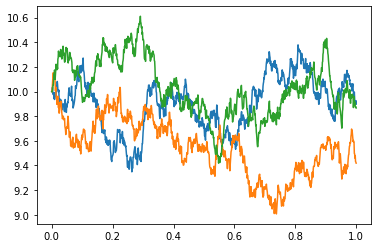

In [2]:
import matplotlib.pyplot as plt
T,B0=BMrealization(10,1,1000)
T,B1=BMrealization(10,1,1000)
T,B2=BMrealization(10,1,1000)
plt.plot(T,B0)
plt.plot(T,B1)
plt.plot(T,B2)

plt.show()

**Distribution of maximum of Brownian motion**

For Brownian motion $B_t, t \in [0,T]$ starting at 0, there is a famous theorem that says that 

$$
P[ \max_{t\in [0,T]} B_t \geq C] = 2P[B_T >C]
$$

for $C>0$.

Since we know that $B_T \sim N(0,T)$ we get 

$$
P[ \max_{t\in [0,T]} B_t >C] = 2(1-\Phi(C/\sqrt{T}))
$$

where $\Phi$ denotes the $N(0,1)$ cumulative distribution function. 

An argument for why this is true goes as follows. Conditionally, given that $B_t \geq C$ for some $t \in [0,T]$ consider the first time $T^*$ that this happens. From that point in time the process $B_t, t\in [T^*,T]$ behaves like Brownian motion starting at 
position $K$ at time $T^*$ and this process at any later time, including time $T$ is equally likely to be below $K$ and above $K.$
Define the event
$$A = \{ B_t\geq K, \mbox{ for some } t \in [0,T]\}.$$
What we just said is that

$$
(1)~~~~~~~~~~ P[X_T > K \vert A] = P[X_T < K \vert A], 
$$

or equivalently (by the definition of conditional probability)

$$
P[\{X_T > K\} \cap A] = P[\{ X_T < K\} \cap  A] 
$$

Observe that $X_T > K$ implies $A$ so $\{X_T > K\} \cap A = \{ X_T>K\}.$ 
Also

$$
P[\{ X_T < K\} \cap  A] + P[\{ X_T > K\} \cap  A] = P[A],
$$ 

so

$$
P[\{ X_T < K\} \cap  A] = P[A] - P[\{ X_T > K\} \cap  A] = P[A] - P[X_T >K]
$$ 

Substituting into (1) we obtain

$$
P[X_T>K] = P[A]-P[X_T>K]
$$

i.e.
$$
P[A] = 2 P[X_T>K].
$$

**Example.** From a standard normal cdf table we know that $\Phi(1) \approx 0.8413447$ so
$$
P[ \max_{t\in [0,T]} B_t >1] \approx 2*(1-.8413447) \approx 0.31731 
$$

**Problem 1 (5 points)**

Use Monte-Carlo simulation to get an approximation $\hat{p}$ for 
$$
P[ \max_{t\in [0,T]} B_t \geq 1].
$$
assuming the Brownian motion starts at position 0 at time 0.

Do this using **N=100** subdivisions of $[0,1]$.

For each Monte-Carlo simulation, using a sample size of n=10,000 realizations of Brownian sample paths, and give a lower and upper 95% confidence bounds for your probability using
$$
\hat{p} \pm 1.96 \sqrt{{\hat{p}(1-\hat{p}) \over n}},
$$
i.e. the 95% lower bound is 
$$
\hat{p} -1.96 \sqrt{{\hat{p}(1-\hat{p}) \over n}}
$$ 
and the 95% upper bound is 
$$
\hat{p}+1.96 \sqrt{{\hat{p}(1-\hat{p}) \over n}}.
$$

Use the following cell for any code you need to provide literal assignments to the following variables.

As usual, you should assign values to these variables **only** in the **literal assignment cell** and **not in the following code cell.**

**p1** - your estimate of the probability based on **N=100** subdivisions

**p1lower** - the 95% lower confidence bound based on **N=100** subdivisions

**p1upper** - the 95% upper confidence bound based on **N=100** subdivisions


using a **Monte Carlo sample size** of 10,000 trials


In [3]:
import numpy as np
ntrials = 10000
s = 0
s2 = 0
count = 0
for _ in range(ntrials):
    T,B = BMrealization(0,1,100)
    if(max(B) >= 1):
        s += 1
est = s / ntrials
CIlower = est - 1.96 * np.sqrt(est * (1 - est) / ntrials)
CIupper = est + 1.96 * np.sqrt(est * (1 - est) / ntrials)
print("expected value estimate = {0:7.5f}".format(est))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

expected value estimate = 0.29240
95% confidence interval = (0.28348,0.30132)


In the following cell give **literal** floating point assignments for what your code produces.

In [4]:
p1 = 0.29240
p1lower = 0.28348
p1upper = 0.30132

**Problem 2 (5 points)**

Run the code from Problem 1 in a loop 10 times and in each case determine whether the **true** value of 0.3171 lies in the confidence interval obtained. Count the number of times this happens and in the literal assignment cell give that number.

In [5]:
import numpy as np
count = 0
for _ in range(10):
    ntrials = 10000
    s = 0
    s2 = 0
    for _ in range(ntrials):
        T,B = BMrealization(0,1,100)
        if(max(B) >= 1):
            s += 1
    est = s / ntrials
    CIlower = est - 1.96 * np.sqrt(est * (1 - est) / ntrials)
    CIupper = est + 1.96 * np.sqrt(est * (1 - est) / ntrials)
    if(CIlower <= 0.31731 and CIupper >= 0.31731):
        count += 1
print("number of times = {}".format(count))

number of times = 0


In the following cell, give a literal **integer** value assignment for the number of times out of the 10 cases in which  your confidence interval contained the value 0.31731. Call this value **number_of_containments2**.

In [6]:
number_of_containments2 = 0

**Problem 3 (5 points)**

In the following **markdown cell** explain why the confidence interval performs so badly.

If you don't have an idea for how to answer, proceed to Problem 4 below and think about what's going on.

Do not modify the first line in the cell.

**Answer to Problem 3**

N = 100 is so small that there is no enough subdivision. So, it make the confidence interval performs so badly.


**Problem 4 (5 points)**

Repeat what you did in Problem 1, but this time take the number of subdivisions of your interval to be 10,000.

Use the following cell for any code you need to provide literal float assignments to the following variables.

As usual, you should assign values to these variables **only** in the **subsequent** cell.

**p4** - your estimate of the probability based on N=10,000 subdivisions

**p4lower** - the 95% lower confidence bound based on N=10,000 subdivisions

**p4upper** - the 95% lower confidence bound based on N=10,000 subdivisions

using a **Monte Carlo sample size** of 10,000 trials

In [7]:
import numpy as np
ntrials = 10000
s = 0
s2 = 0
for _ in range(ntrials):
    T,B = BMrealization(0,1,10000)
    if(max(B) >= 1):
            s += 1
est = s / ntrials
CIlower = est - 1.96 * np.sqrt(est * (1 - est) / ntrials)
CIupper = est + 1.96 * np.sqrt(est * (1 - est) / ntrials)
print("expected value estimate = {0:7.5f}".format(est))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

expected value estimate = 0.31570
95% confidence interval = (0.30659,0.32481)


In the following cell, give literal float assignments for **p4** and **p4lower** and **p4upper**

In [8]:
p4 = 0.31570
p4lower = 0.30659
p4upper = 0.32481

**Problem 5 (5 points)**

Repeat what you did in Problem 2, but this time take the number of subdivisions of your interval to be 10,000. Count the number of times the confidence interval contains 0.31731 and use the value you obtain to make a literal integer assignment in the **literal assignment** cell.


In [9]:
import numpy as np
count = 0
for _ in range(10):
    ntrials = 10000
    s = 0
    s2 = 0
    for _ in range(ntrials):
        T,B = BMrealization(0,1,10000)
        if(max(B)>=1):
            s += 1
    est = s / ntrials
    CIlower = est - 1.96 * np.sqrt(est * (1 - est) / ntrials)
    CIupper = est + 1.96 * np.sqrt(est * (1 - est) / ntrials)
    if(CIlower <= 0.31731 and CIupper >= 0.31731):
        count += 1
print("Number of times = {}".format(count))

Number of times = 10


In the following cell, give a literal **integer** value assignment for the number of times out of the 10 cases in which  your confidence interval contained the value 0.31731. Call this value **number_of_containments5**.

In [10]:
number_of_containments5 = 10

**Stopping when an event occurs**

Instead of running Brownian motion for a pre-determined amount of time, we might want to run it until $B_t$ satisfies some condition. For example, suppose we want to know the expected amount of time it takes for the 
Brownian motion path to cross some barrier. 

Here is an example. In the figure below we see plots of the the curves $\pm .75(1-t^3)$ (in black) and three independent Brownian paths. 

Each path must eventually cross the barrier defined by the black curves at some point in time. What is the expected value of that random time when this occurs?

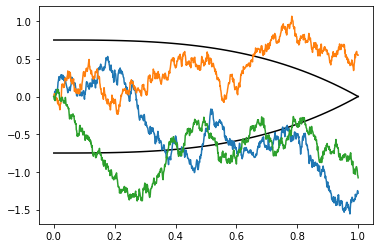

In [11]:
import matplotlib.pyplot as plt
t=np.linspace(0,1)
y1=.75*(1-t**3)
y2=-.75*(1-t**3)
plt.plot(t,y1,color="black")
plt.plot(t,y2,color="black")
T,B=BMrealization(0,1,1000)
plt.plot(T,B)
T,B=BMrealization(0,1,1000)
plt.plot(T,B)
T,B=BMrealization(0,1,1000)
plt.plot(T,B)


**Problem 6 (5 points)** 

Write a program called **generate_hitting_time** that takes as input 

Ths code should take as arguments

- **B0** = starting position for Brownian motion at time 0
- **delta** = size of time interval for discretization 
- **r** = threshold value 

The code should generate a single realization of Brownian motion **only at times up to the first time we satisfy**

$$
\left| \frac{B_t}{1-t^3} \right|\geq r
$$ 

(so your code should not generate a full path up to time 1 unless needed).
and return 

- **t** = the first time that the condition above occurs.

In [12]:
def generate_hitting_time(B0,delta,r):
    t = 0
    Bt = B0
    while abs(Bt / (1 - t ** 3)) < r:
        t += delta
        Bt += np.sqrt(delta) * np.random.normal(0,1)
    return t

**Problem 7 (5 points)**

Using a Monte-Carlo sample size of 10,000 and the function you provided in Problem 6 
with **delta = .0001** to estimate the expected value of of the time at which Brownian motion starting at 0 at time 0 first crosses the barrier 
$$
\left| \frac{B_t}{1-t^3} \right| =  .75
$$ 

Use the following cell for your code. 

**Note:** Here, your estimate should be the sample mean of hitting times $T_1,\ldots,T_n$ based on $10,000$ realizations, and your approximate 95% confidence interval can be taken to be of the form
$$
\overline{T} \pm 1.96 s/\sqrt{n},
$$
where $s$ denotes the sample standard deviation
$$
s= \sqrt{{\sum_{i=1}^n (T_i - \overline{T})^2 \over (n-1)}}.
$$

In the literal assignment cell, give the following

**e7** - estimate of the expected value 

**e7lower** - 95% lower bound for the expected value

**e7upper** - 95% upper bound for the expected value


In [13]:
import numpy as np
ntrials = 10000
list = []
for _ in range(ntrials):
    t = generate_hitting_time(0,.0001,.75)
    list.append(t)
est = np.mean(list)
stddev = np.std(list, ddof = 1)
CIlower = est - 1.96 * stddev / np.sqrt(ntrials)
CIupper = est + 1.96 * stddev / np.sqrt(ntrials)
print("expected value estimate = {0:7.5f}".format(est))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

expected value estimate = 0.43252
95% confidence interval = (0.42807,0.43696)


In the following cell give literal float assignments for the values obtained from your code.

In [14]:
e7 = 0.43252
e7lower = 0.42807
e7upper = 0.43696

**Higher-Dimensional Brownian Motion**

We can also define *standard* Brownian motion in higher dimensions. Just like we simulated Brownian using a rescaled random walk, we can do the same in higher dimensions. For example for dimension 2, a random walk starting at (0,0) can make a jump at time $j\Delta$ by an increment of $\sqrt{\Delta}(Z_1,Z_2)$ where $Z_1$ and $Z_2$ are independent $N(0,1)$ random variables, for $j=0,1,\ldots.$ As $\Delta \rightarrow 0$ we get sample paths of the form $(B^{(1)}_t,B^{(2)}_t)$, where $B^{(i)}_t$ are independent Brownian motions for $i=1,2.$

**Bottom line:** We can simulate *standard* Brownian motion in 2-d starting at (0,0) by using two independent simulations of 1-d Brownian motion. 

Below we generate 3 independent realizations of this process in the time interval $[0,.1]$ and plot them.


(-1.0, 1.0)

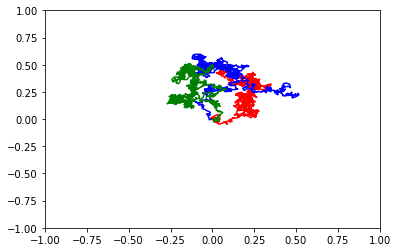

In [15]:
import matplotlib.pyplot as plt
T,B1=BMrealization(0,.1,1000)
T,B2=BMrealization(0,.1,1000)
plt.plot(B1,B2,marker='.', markersize=.01,color="red")
T,B1=BMrealization(0,.1,1000)
T,B2=BMrealization(0,.1,1000)
plt.plot(B1,B2,marker='.', markersize=.01,color="blue")
T,B1=BMrealization(0,.1,1000)
T,B2=BMrealization(0,.1,1000)
plt.plot(B1,B2,marker='.', markersize=.01,color="green")
plt.xlim(-1,1)
plt.ylim(-1,1)

**Problem 8 (5 points)**

Write a function **BM_circle_hitting_time** that simulates 2d Brownian motion $(B^{(1)}_t,B^{(2)}_t)$ starting at (0,0) at time 0 **until** the condition 

$$(B^{(1)}_t)^2+(B^{(2)}_t)^2 \geq r^2$$

(hitting the circle centered at 0 and having radius r) is satisfied, and outputs the time at which this happens.

Your function should take as inputs:

- **delta** - time increment
- **r** -  radius of circle

Your code should **not create** any of the path beyond the hitting time. (Otherwise your code will not be as efficient as it should be.)


In [16]:
def BM_circle_hitting_time(delta,r):
    Bt1 = 0
    Bt2 = 0
    t = 0
    while abs(Bt1 ** 2 + Bt2 ** 2) < r ** 2:
        t += delta
        Bt1 += np.sqrt(delta)*np.random.normal(0,1)
        Bt2 += np.sqrt(delta)*np.random.normal(0,1)
    return t

**Problem 9 (5 points)** 

Use Monte-Carlo simulation to estimate expected amount of time it takes for 2-d Brownian motion starting at (0,0) at time 0 to hit the unit circle 

$$
\{ (x,y)~:~ x^2 + y^2 = 1\}
$$

and give the half-width for a 95% confidence interval (based on the confidence interval formulas in question 3).

Take $10,000$ realizations and use delta=.0001.

Use the following cell for your code and in the subsequent literal assignment cell assign values to 

**e9** - estimate of the expected value

**e9lower** - 95% lower confidence bound for the expected value

**e9upper** = 95% upper confidence bound for the expected value

In [17]:
import numpy as np
ntrials = 10000
list = []
for _ in range(ntrials):
    t = BM_circle_hitting_time(.0001, 1)
    list.append(t)
est = np.mean(list)
stddev = np.std(list, ddof = 1)
CIlower = est - 1.96 * stddev / np.sqrt(ntrials)
CIupper = est + 1.96 * stddev/ np.sqrt(ntrials)
print("expected value estimate = {0:7.5f}".format(est))
print("95% confidence interval = ({0:7.5f},{1:7.5f})".format(CIlower,CIupper))

expected value estimate = 0.50509
95% confidence interval = (0.49803,0.51215)


In the following cell use literal float value assignments to the variables requested.

In [18]:
e9 = 0.50509
e9lower = 0.49803
e9upper = 0.51215

**d-Dimensional Brownian Motion**

We can generalize in a natural way to Brownian motion in $d$ dimensions starting at the origin $(0,\ldots,0).$ Here we just create a process with $d$ coordinates, where the coordinates are $d$ independent realizations of Brownian motion.

**Problem 10.** 

Write a program that takes as arguments

- **delta** - time increment
- **d** dimension

and computes a realization of $d$-dimensional Brownian motion that starts at the origin in $\mathbb{R}^d$ **until it exits unit ball**

$$
\{ x = (x_1,\ldots,x_d) ~:~ \sum_{i=1}^d x_i^2 \leq 1\}.
$$

and returns 

- **t** - the time at which this happens.

Call your program  **BM_unit_ball_exit_time**.

Your code should **not create** any of the path beyond the hitting time. (Otherwise your code will not be as efficient as it should be.)

In [19]:
def BM_unit_ball_exit_time(delta,d):
    t = 0
    Bts = [0 for _ in range (d)]
    while sum([Bt ** 2 for Bt in Bts]) <= 1:
        t += delta
        for i in range (d):
            Bts[i] += np.sqrt(delta) * np.random.normal(0,1)
    return t

**Problem 11 (5 points)**

Use your code to estimate the expected amount of time it takes $d$-dimensional Brownian motion starting at the origin in $\mathbb{R}^d$ to leave the unit ball for d=1,2,3,4,5,6,7,8,9,10.

In the literal assignment cell, give estimates of the expected value for each value of d using variables called:

**expected_exit_time1**

**expected_exit_time2**

**expected_exit_time3**

**expected_exit_time4**

**expected_exit_time5**

**expected_exit_time6**

**expected_exit_time7**

**expected_exit_time8**

**expected_exit_time9**

**expected_exit_time10**

Your estimates do not need to be terrible precise, but you should make them precise enough that you can give a plausible conjecture as to the exact value of this expected hitting time no matter what the dimension is.

Use the following cell to put your code.

In [20]:
import numpy as np
ntrials = 1000
for i in range(1,11):
    list = []
    for _ in range(ntrials):
        list.append(BM_unit_ball_exit_time(.0001, i))
    est = np.mean(list)   
    print("estimate of time : {0} = {1:7.5f}".format(i, est))

estimate of time : 1 = 1.04894
estimate of time : 2 = 0.51054
estimate of time : 3 = 0.33866
estimate of time : 4 = 0.24957
estimate of time : 5 = 0.19729
estimate of time : 6 = 0.16899
estimate of time : 7 = 0.14477
estimate of time : 8 = 0.12500
estimate of time : 9 = 0.11441
estimate of time : 10 = 0.10086


In the following literal assignment cell, give your estimates of the expected exit times. Your estimates should be given as literal floats.

In [21]:
expected_exit_time1 = 1.04894
expected_exit_time2 = 0.51054
expected_exit_time3 = 0.33866
expected_exit_time4 = 0.24957
expected_exit_time5 = 0.19729
expected_exit_time6 = 0.16899
expected_exit_time7 = 0.14477
expected_exit_time8 = 0.12500
expected_exit_time9 = 0.11441
expected_exit_time10 = 0.10086

**Problem 12 (5 points)**

Use the data you obtain to give a closed-form expression that you speculate is the **true** expected value of the exit time of the unit ball in d-dimensions as a function of d.

Put your answer in the following markdown cell and do not modify the first line in that cell.

**Answer to Problem 12**

expected value of the exit time is 1/d

**When you are done with the assignment save your notebook <u>after</u> running all cells.**

**Then submit your saved notebook.**